In [1]:
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def time_series_to_visibility_network(time_series):
    """
    Converts a 1D time series to a Network based on the Visibility algorithm.
    
    Parameters
    ----------
    time_series: Input 1D time series.
        If None an empty graph is created. 
    
    Returns
    -------
    
    a networkx.graph instance which is the visibility network of given time series.
    
    """
    
    visibility_network = nx.Graph()
    
    list_of_time_series_with_time_step = []
    
    for index in range(len(time_series)):
        list_of_time_series_with_time_step.append((index, time_series[index]))
    
    for point_a,point_b in combinations(list_of_time_series_with_time_step, 2):
        
        time_step_a, magnitude_a = point_a
        time_step_b, magnitude_b = point_b
        
        is_point_a_visible_to_b = True
        
        for point_c in list_of_time_series_with_time_step[time_step_a+1:time_step_b]:
            
            time_step_c, magnitude_c = point_c
            
            if magnitude_c > magnitude_b + (magnitude_a - magnitude_b) * ( (time_step_b - time_step_c) / (time_step_b - time_step_a) ):
                is_point_a_visible_to_b = False
        
        if is_point_a_visible_to_b:
            visibility_network.add_edge(time_step_a, time_step_b)
            
    return visibility_network

In [3]:
series = [0.87, 0.49, 0.36, 0.83, 0.87]

In [4]:
Graph = time_series_to_visibility_network(series)

In [5]:
Graph.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (2, 3), (3, 4)])

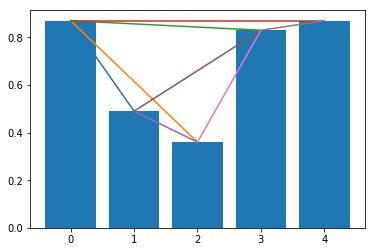

In [6]:
plt.bar(range(len(series)),series)
for aedge in Graph.edges():
    t_a, t_b = aedge
    y = [series[t_a], series[t_b]]
    plt.plot(aedge, y)

C:\Users\nikhi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


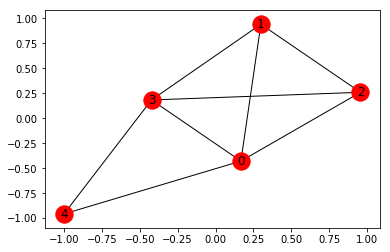

In [11]:
nx.draw_networkx(Graph)

In [7]:
series_2 = [0.87, 0.49, 0.36, 0.83, 0.87, 0.49, 0.36, 0.83,0.87, 0.49, 0.36, 0.83,0.87, 0.49, 0.36, 0.83,0.87, 0.49, 0.36, 0.83]

In [8]:
Graph_2 = time_series_to_visibility_network(series_2)

In [9]:
Graph.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (2, 3), (3, 4)])

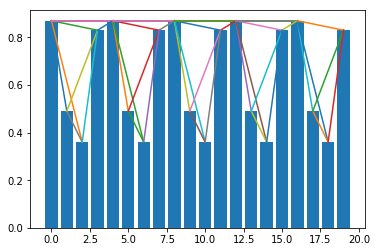

In [10]:
plt.bar(range(len(series_2)),series_2)
for aedge in Graph_2.edges():
    t_a, t_b = aedge
    y = [series_2[t_a], series_2[t_b]]
    plt.plot(aedge, y)

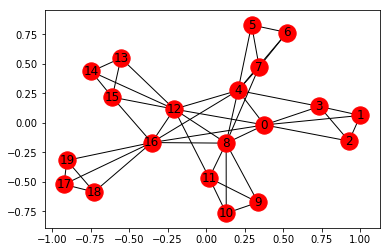

In [12]:
nx.draw_networkx(Graph_2)